In [1]:
import pandas as pd
import numpy as np
import statistics as stat
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import lilliefors
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
import itertools
import statsmodels.api as sm
import pandas as pd
import numpy as np
from statsmodels.tools.eval_measures import aic, bic
from scipy import stats
from scipy.stats import boxcox

In [2]:
WTO_data = pd.read_csv('Life Expectancy Data.csv', index_col=None)
label = LabelEncoder()
WTO_data['Status'] = label.fit_transform(WTO_data['Status'])
df_clean = WTO_data

In [3]:
transform_data = df_clean.copy()
has_nan = transform_data.isna().any().any()
print(has_nan)
transform_data.dropna(axis=0, inplace=True)

True


In [4]:
transform_data['log thinness 5-9 years'] = np.log(transform_data[' thinness 5-9 years'] + 1)
transform_data['log thinness  1-19 years']  = np.log(transform_data[' thinness  1-19 years']  + 1)
transform_data['log Total expenditure']  = np.log(transform_data['Total expenditure']  + 1)
transform_data['log percentage expenditure']  = np.log(transform_data['percentage expenditure']  + 1)

transform_data['log Polio']  = np.log(transform_data['Polio']  + 1)
transform_data['log Hepatitis B']  = np.log(transform_data['Hepatitis B']  + 1)
transform_data['log Measles']  = np.log(transform_data['Measles ']  + 1)
transform_data['log Diphtheria']  = np.log(transform_data['Diphtheria ']  + 1)
transform_data['log HIV/AIDS']  = np.log(transform_data[' HIV/AIDS']  + 1)
transform_data['GDP'] = transform_data['GDP'] / 100
transform_data = transform_data.drop(columns = ['Polio','Hepatitis B','Measles ','Diphtheria ',' HIV/AIDS','percentage expenditure','Total expenditure',' thinness  1-19 years',' thinness 5-9 years','infant deaths','under-five deaths ','Income composition of resources','Population'])
transform_data = transform_data.drop(columns = ['Year','Country'])
transform_data.columns

Index(['Status', 'Life expectancy ', 'Adult Mortality', 'Alcohol', ' BMI ',
       'GDP', 'Schooling', 'log thinness 5-9 years',
       'log thinness  1-19 years', 'log Total expenditure',
       'log percentage expenditure', 'log Polio', 'log Hepatitis B',
       'log Measles', 'log Diphtheria', 'log HIV/AIDS'],
      dtype='object')

Index(['Status', 'Life expectancy ', 'Adult Mortality', 'Alcohol', ' BMI ',
       'GDP', 'Schooling', 'log thinness 5-9 years',
       'log thinness  1-19 years', 'log Total expenditure',
       'log percentage expenditure', 'log Polio', 'log Hepatitis B',
       'log Measles', 'log Diphtheria', 'log HIV/AIDS'],
      dtype='object')


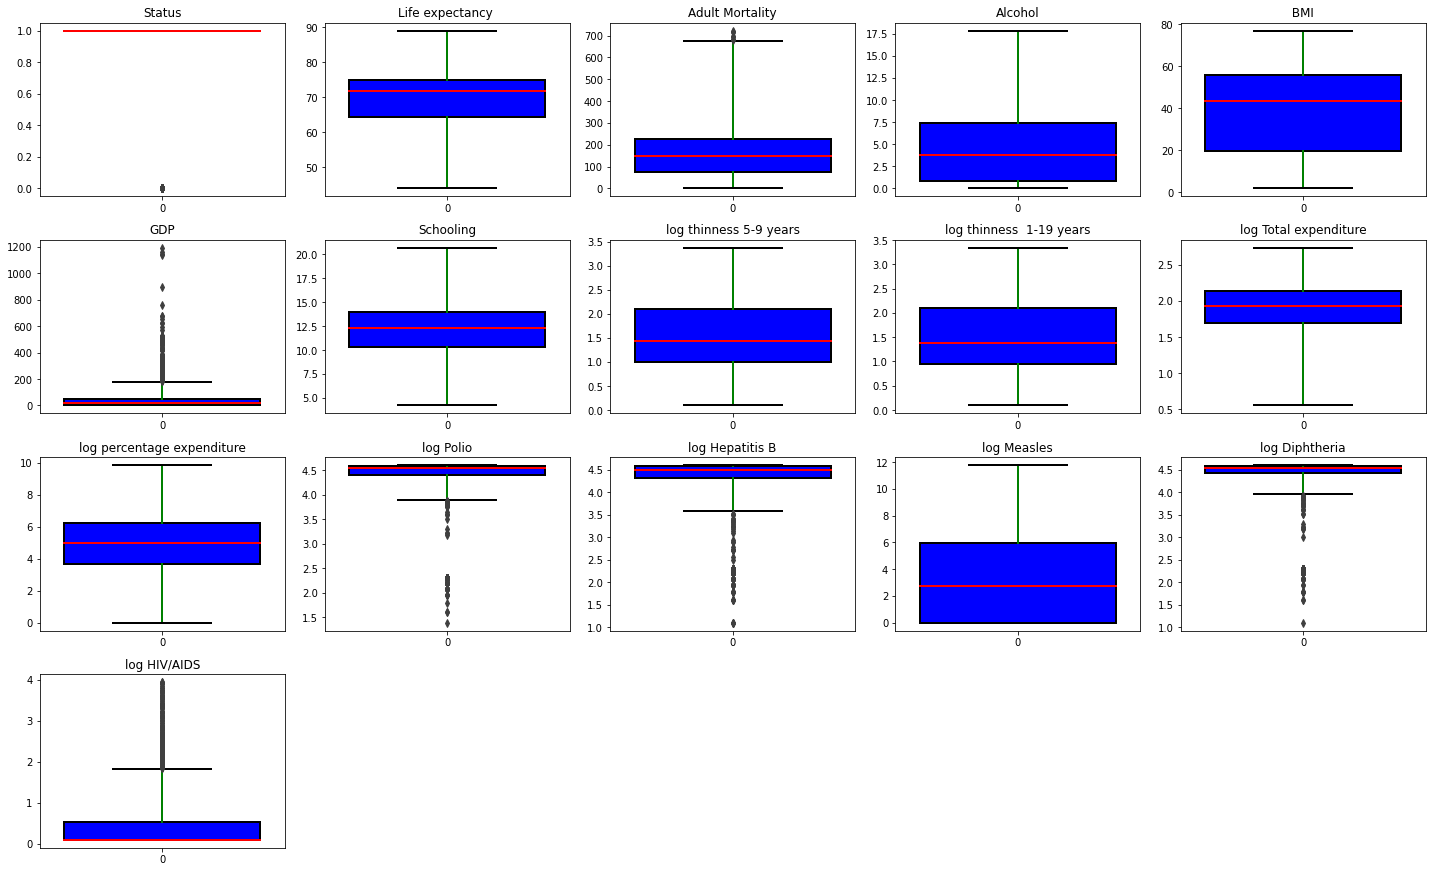

In [5]:
numeric_columns = transform_data.drop(columns=[col for col in transform_data.columns if 'Year' in col or 'Country' in col]).columns
print(numeric_columns)

plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(
        data=transform_data[column],
        whis=3,
        boxprops=dict(linewidth=2, facecolor='blue', edgecolor='black'),  # Adjusted here
        medianprops=dict(color='red', linewidth=2),
        whiskerprops=dict(color='green', linewidth=2),
        capprops=dict(color='black', linewidth=2)
    )
    plt.title(column)
    plt.tight_layout()

plt.show()

In [6]:
#treatment for outliers
for column in numeric_columns:
    if column != 'Status':
        col_data = transform_data[column]
        col_data = col_data.sort_values()
        Q1 = col_data.iloc[int(0.25*len(col_data))]
        Q3 = col_data.iloc[int(0.75*len(col_data))]
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        transform_data[column] = np.clip(transform_data[column], lower_bound, upper_bound)

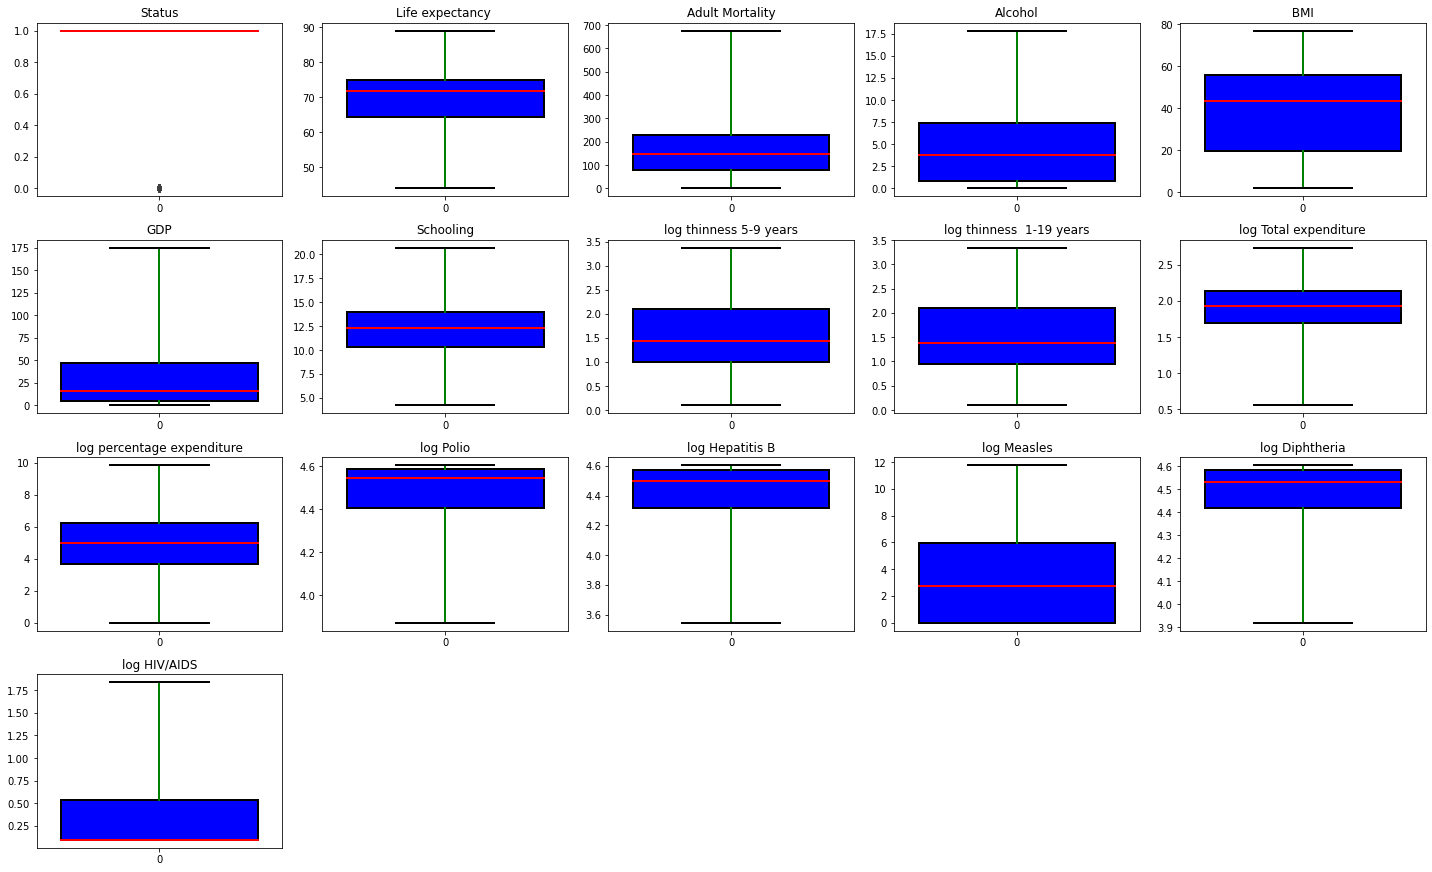

In [7]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(
        data=transform_data[column],
        whis=3,
        boxprops=dict(linewidth=2, facecolor='blue', edgecolor='black'),  # Adjusted here
        medianprops=dict(color='red', linewidth=2),
        whiskerprops=dict(color='green', linewidth=2),
        capprops=dict(color='black', linewidth=2)
    )
    plt.title(column)
    plt.tight_layout()

plt.show()

In [8]:
transform_data.describe().columns

Index(['Status', 'Life expectancy ', 'Adult Mortality', 'Alcohol', ' BMI ',
       'GDP', 'Schooling', 'log thinness 5-9 years',
       'log thinness  1-19 years', 'log Total expenditure',
       'log percentage expenditure', 'log Polio', 'log Hepatitis B',
       'log Measles', 'log Diphtheria', 'log HIV/AIDS'],
      dtype='object')

In [9]:
X = transform_data.drop(['Life expectancy ','log thinness  1-19 years','log Total expenditure'], axis=1)
Y = transform_data['Life expectancy ']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train

,Status,Adult Mortality,Alcohol,BMI,GDP,Schooling,log thinness 5-9 years,log percentage expenditure,log Polio,log Hepatitis B,log Measles,log Diphtheria,log HIV/AIDS
1557,1,235.0,0.87,19.0,4.439611,10.2,2.116256,4.110532,4.276666,3.545820,1.098612,3.920460,0.336472
2448,1,172.0,2.10,18.5,2.544892,13.3,2.797281,2.934614,4.595120,4.595120,3.526361,4.595120,0.095310
27,1,17.0,4.54,48.9,24.165882,10.9,1.064711,5.406467,4.595120,4.605170,2.079442,4.584967,0.095310
2670,1,12.0,1.28,56.5,4.141518,14.4,1.987874,4.187473,4.595120,4.595120,0.693147,4.595120,0.095310
1145,1,159.0,3.14,45.1,17.515959,11.1,1.193922,5.450658,4.543295,4.532599,0.000000,4.543295,0.470004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,1,22.0,6.29,52.3,12.865651,15.0,1.252763,3.236509,4.564348,4.564348,5.774552,4.564348,0.095310
1473,1,112.0,2.26,57.9,53.349333,14.9,1.757858,6.004844,4.430817,4.430817,1.791759,4.430817,0.095310
2054,0,153.0,8.40,53.1,44.927276,14.6,1.335001,6.024494,4.595120,4.605170,4.356709,4.595120,0.095310
987,1,126.0,6.18,49.2,18.726842,12.6,1.360977,4.710555,4.499810,4.442651,5.814131,4.488636,0.095310


Deal with multicolinearity

In [10]:
scaler = StandardScaler()
X_scaled_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns,index=Y_train.index)

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_scaled_train.values, i) for i in range(X_scaled_train.shape[1])]
vif["Feature"] = X_train.columns
print(vif)

         VIF                     Feature
0   1.803074                      Status
1   1.796257             Adult Mortality
2   2.235732                     Alcohol
3   1.926180                        BMI 
4   3.056215                         GDP
5   2.950590                   Schooling
6   1.947582      log thinness 5-9 years
7   2.841690  log percentage expenditure
8   2.404851                   log Polio
9   1.711316             log Hepatitis B
10  1.219649                 log Measles
11  2.865631              log Diphtheria
12  1.991848                log HIV/AIDS


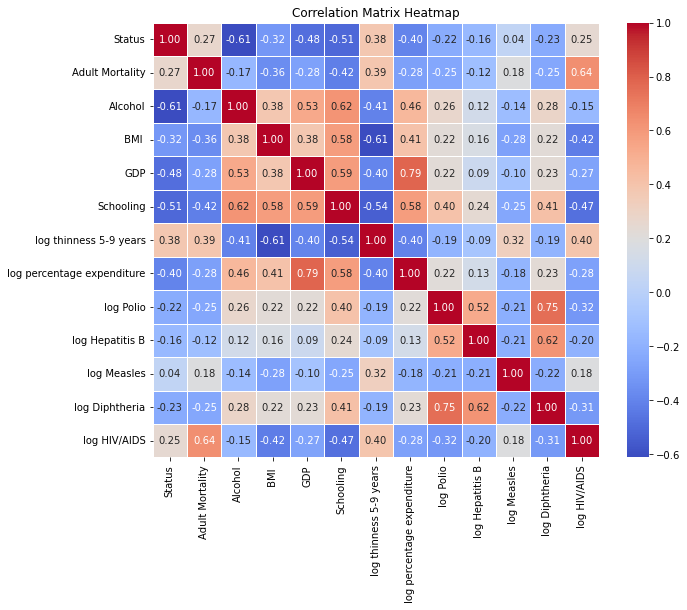

In [11]:
corr_matrix = X_scaled_train.corr()
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

In [12]:
X_scaled_train.drop(columns='log percentage expenditure',inplace=True)
X_test.drop(columns='log percentage expenditure',inplace=True)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_scaled_train.values, i) for i in range(X_scaled_train.shape[1])]
vif["Feature"] = X_scaled_train.columns
print(vif)

         VIF                 Feature
0   1.801280                  Status
1   1.795125         Adult Mortality
2   2.235547                 Alcohol
3   1.920087                    BMI 
4   1.712036                     GDP
5   2.887331               Schooling
6   1.946427  log thinness 5-9 years
7   2.403149               log Polio
8   1.707600         log Hepatitis B
9   1.209929             log Measles
10  2.865422          log Diphtheria
11  1.990539            log HIV/AIDS


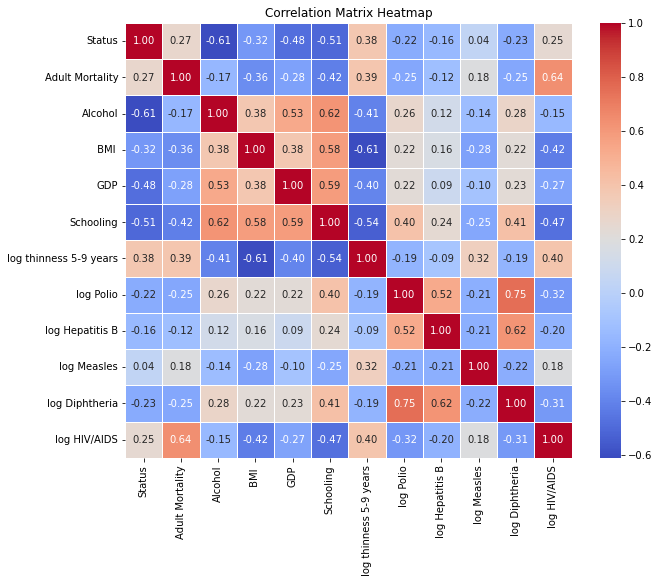

In [13]:
corr_matrix = X_scaled_train.corr()
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
X_scaled_train

,Status,Adult Mortality,Alcohol,BMI,GDP,Schooling,log thinness 5-9 years,log Polio,log Hepatitis B,log Measles,log Diphtheria,log HIV/AIDS
1557,0.406441,0.544739,-0.884300,-0.985985,-0.664613,-0.673865,0.840527,-0.796707,-2.541080,-0.679514,-2.775237,-0.180522
2448,0.406441,0.030456,-0.577651,-1.011618,-0.702420,0.449445,1.799585,0.719569,0.710923,0.070822,0.742056,-0.603973
27,0.406441,-1.234843,0.030662,0.546885,-0.270999,-0.420214,-0.640316,0.719569,0.742071,-0.376372,0.689127,-0.603973
2670,0.406441,-1.275659,-0.782083,0.936510,-0.670562,0.848038,0.659734,0.719569,0.710923,-0.804830,0.742056,-0.603973
1145,0.406441,-0.075666,-0.318370,0.352072,-0.403690,-0.347743,-0.458353,0.472811,0.517159,-1.019059,0.471869,0.053943
...,...,...,...,...,...,...,...,...,...,...,...,...
1347,0.406441,-1.194027,0.466951,0.721191,-0.496482,1.065453,-0.375491,0.573054,0.615555,0.765664,0.581630,-0.603973
1473,0.406441,-0.459337,-0.537761,1.008283,0.311323,1.029217,0.335812,-0.062739,0.201713,-0.465285,-0.114527,-0.603973
2054,-2.460381,-0.124645,0.992992,0.762204,0.143271,0.920510,-0.259678,0.719569,0.742071,0.327455,0.742056,-0.603973
987,0.406441,-0.345052,0.439527,0.562265,-0.379528,0.195794,-0.223098,0.265762,0.238391,0.777896,0.186911,-0.603973


In [15]:
# Stepwise forward selection
def stepwise_forward_selection(X, y, significance_level=0.05):
    selected_vars = []
    remaining_vars = list(X.columns)
    current_model = None

    while remaining_vars:
        # Step 1: Find the best variable to add based on partial F-statistics
        f_stats_with_candidates = []
        for candidate in remaining_vars:
            X_with_candidate = sm.add_constant(X[selected_vars + [candidate]])
            model = sm.OLS(y, X_with_candidate).fit()

            # Calculate partial F-stat for the candidate variable
            f_stat_candidate = model.f_pvalue
            f_stats_with_candidates.append((f_stat_candidate, candidate))

        # Sort by F-statistic significance (lowest p-value indicates highest significance)
        f_stats_with_candidates.sort()
        best_f_stat, best_candidate = f_stats_with_candidates[0]

        # Step 2: Add the best candidate if it improves the model
        if best_f_stat < significance_level:
            selected_vars.append(best_candidate)
            remaining_vars.remove(best_candidate)
            current_model = sm.OLS(y, sm.add_constant(X[selected_vars])).fit()

            # Step 3: Check all included variables and remove those with insignificant F-statistics
            p_values = current_model.pvalues[1:]  # Ignore the intercept p-value
            insignificant_vars = [var for var, p in p_values.items() if p > significance_level]

            # Remove any insignificant variables
            for var in insignificant_vars:
                selected_vars.remove(var)

            # Refit model after removals
            current_model = sm.OLS(y, sm.add_constant(X[selected_vars])).fit()
        else:
            # Stop if no further improvement
            break

    return current_model, selected_vars

# Perform forward stepwise selection
forward_model, forward_selected_features = stepwise_forward_selection(X_scaled_train, Y_train)

# Output the selected features and model summary
print("Selected Features:", forward_selected_features)
print(forward_model.summary())

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except f

Selected Features: ['log HIV/AIDS', 'Adult Mortality', ' BMI ', 'GDP', 'Schooling', 'Status', 'log Diphtheria', 'log Hepatitis B', 'log Measles', 'log thinness 5-9 years']
                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     657.4
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:09:58   Log-Likelihood:                -3534.9
No. Observations:                1319   AIC:                             7092.
Df Residuals:                    1308   BIC:                             7149.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    s

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
# List to store the results
all_models_results = []

# Function to calculate regression for a given subset of variables
def evaluate_subset(X_subset, y, X):
    # Fit the OLS model
    model = sm.OLS(y, sm.add_constant(X_subset)).fit()

    # Calculate Cp
    n = len(y)  # number of observations
    p = X_subset.shape[1]  # number of predictors
    mse_full = sm.OLS(y, sm.add_constant(X)).fit().mse_resid  # mean squared error of the full model
    cp = model.ssr / mse_full - (n - 2 * p)

    # Calculate PRESS
    y_pred = model.predict(sm.add_constant(X_subset))
    residuals = y - y_pred
    press = np.sum((residuals / (1 - model.get_influence().hat_matrix_diag))**2)

    # Save the evaluation metrics
    return {
        'subset': X_subset.columns.tolist(),
        'aic': model.aic,
        'bic': model.bic,
        'adjusted_r2': model.rsquared_adj,
        'cp': cp,
        'press': press,
        'model': model
    }

X_used_train = X_scaled_train[forward_selected_features]
# Evaluate all possible subsets of the predictors
for k in range(1, len(forward_selected_features) + 1):
    for subset in itertools.combinations(forward_selected_features, k):
        X_subset = X_used_train[list(subset)]
        result = evaluate_subset(X_subset, Y_train, X_used_train)
        all_models_results.append(result)

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Comparion of the models

In [17]:
results_df = pd.DataFrame(all_models_results)

# Add a column for model index and number of variables
results_df['model_index'] = range(1, len(results_df) + 1)
results_df['num_variables'] = results_df['subset'].apply(len)

# Sort by adjusted R-squared (descending), number of variables, AIC, BIC, Cp, and PRESS (all ascending)
sorted_results_df = results_df.sort_values(by=['adjusted_r2', 'num_variables', 'aic', 'bic', 'cp', 'press'],
                                           ascending=[False, True, True, True, True, True])

# Select the columns of interest
final_df = sorted_results_df[['model_index', 'num_variables', 'aic', 'bic', 'adjusted_r2', 'cp', 'press']]

# Print the final DataFrame
final_df.head(20)

,model_index,num_variables,aic,bic,adjusted_r2,cp,press
1022,1023,10,7091.889834,7148.920755,0.832783,9.000000,16742.480606
1014,1015,9,7094.709246,7146.555538,0.832299,11.787962,16773.731128
1019,1020,9,7094.736845,7146.583137,0.832296,11.815431,16780.780738
1016,1017,9,7095.255488,7147.101779,0.832230,12.331743,16785.915747
1013,1014,9,7095.541423,7147.387715,0.832193,12.616481,16790.904626
990,991,8,7096.984965,7143.646627,0.831883,14.050448,16805.084813
969,970,8,7097.218013,7143.879675,0.831853,14.283172,16808.006441
975,976,8,7097.346533,7144.008195,0.831837,14.411531,16808.320907
974,975,8,7097.553866,7144.215529,0.831810,14.618632,16817.870469
992,993,8,7097.849662,7144.511325,0.831773,14.914151,16821.104051


In [18]:
selected_model = results_df.iloc[678,:]
selected_model['subset']

['log HIV/AIDS',
 'Adult Mortality',
 'GDP',
 'Schooling',
 'log Diphtheria',
 'log thinness 5-9 years']

In [19]:
X_selected_train_const = sm.add_constant(X_scaled_train[selected_model['subset']])
model = sm.OLS(Y_train, X_selected_train_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     1082.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:10:30   Log-Likelihood:                -3543.7
No. Observations:                1319   AIC:                             7101.
Df Residuals:                    1312   BIC:                             7138.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     69

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


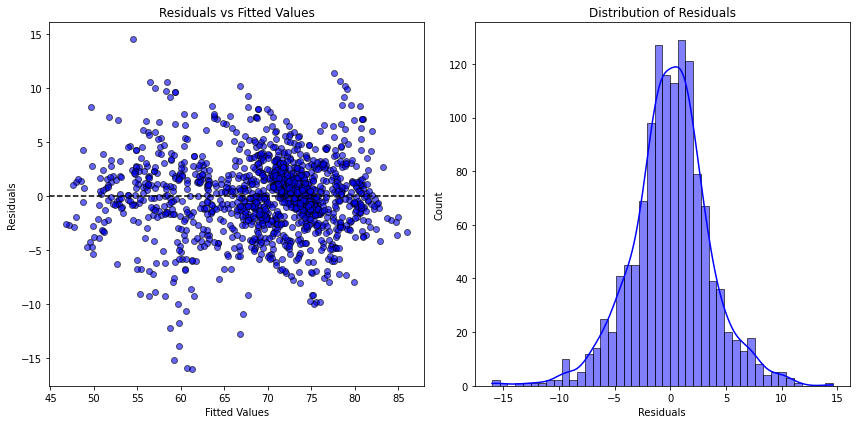

D:\Anaconda\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


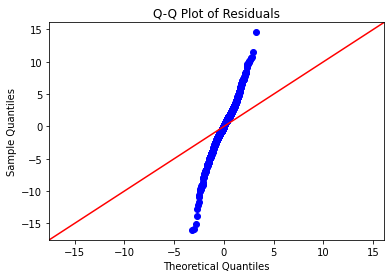

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     1082.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:10:32   Log-Likelihood:                -3543.7
No. Observations:                1319   AIC:                             7101.
Df Residuals:                    1312   BIC:                             7138.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     69

In [20]:
def residual_analysis(X, y, transformation_suggestions=True, model=None):
    """
    Perform residual analysis for a linear regression model, and suggest transformations if necessary.

    Parameters:
    X -- pandas DataFrame with independent variables
    y -- pandas Series with the dependent variable
    transformation_suggestions -- if True, suggest transformations based on residual analysis

    Returns:
    residuals -- model residuals
    """

    # Add constant term
    X_with_const = sm.add_constant(X)
    if model is None:
        model = sm.OLS(y, X_with_const).fit()  # Fit the linear regression model

    residuals = model.resid
    fitted_vals = model.fittedvalues

    # Plot Residuals vs Fitted values to check for Homoscedasticity
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(fitted_vals, residuals, edgecolor='k', facecolor='blue', alpha=0.6)
    plt.axhline(0, color='black', linestyle='--')
    plt.title('Residuals vs Fitted Values')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')

    # Plot the histogram of residuals to check for normality
    plt.subplot(1, 2, 2)
    sns.histplot(residuals, kde=True, color='blue')
    plt.title('Distribution of Residuals')
    plt.xlabel('Residuals')

    plt.tight_layout()
    plt.show()

    # Q-Q plot for normality
    sm.qqplot(residuals, line='45')
    plt.title('Q-Q Plot of Residuals')
    plt.show()

    # Perform Shapiro-Wilk test for normality
    shapiro_test = stats.shapiro(residuals)
    print(model.summary())
    print(f"\nShapiro-Wilk Test for Normality: W={shapiro_test[0]:.4f}, p-value={shapiro_test[1]:.4f}")

    if shapiro_test[1] < 0.05:
        print("Residuals are not normally distributed (p < 0.05). A transformation may be required.")
    else:
        print("Residuals appear to be normally distributed (p >= 0.05).")

    # Checking for homoscedasticity
    bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, X_with_const)
    print(f"\nBreusch-Pagan test for Homoscedasticity: Lagrange Multiplier statistic={bp_test[0]:.4f}, p-value={bp_test[1]:.4f}")

    if bp_test[1] < 0.05:
        print("Residuals are heteroscedastic (p < 0.05). A transformation may be required.")
    else:
        print("Residuals are homoscedastic (p >= 0.05).")

    return residuals, model


residuals, ini_model = residual_analysis(X_scaled_train[selected_model['subset']], Y_train)



Deal with outliers

high semi_studentized_residuals samples: [ 150  180  185  414  468  525  897 1024 1249 1281 1313]
Remaining samples: 1318


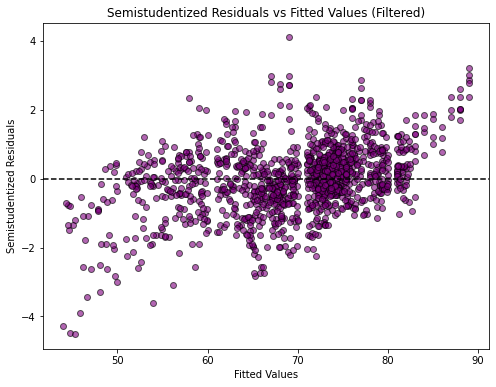

In [21]:
semi_studentized_residuals = residuals / np.std(residuals)
def remove_semi_points(semi_studentized_residuals, threshold=3):
    influential_points = np.where(np.abs(semi_studentized_residuals) > threshold)[0]
    return influential_points

high_semi_points = remove_semi_points(semi_studentized_residuals)
print("high semi_studentized_residuals samples:", high_semi_points)

X_scaled_train_1 = X_scaled_train.drop(index=high_semi_points, errors='ignore').reset_index(drop=True)
Y_train_1 = Y_train.drop(index=high_semi_points, errors='ignore').reset_index(drop=True)
semi_studentized_residuals = semi_studentized_residuals.drop(index=high_semi_points, errors='ignore').reset_index(drop=True)

print(f"Remaining samples: {len(X_scaled_train_1)}")

# Plot the filtered semistudentized residuals vs fitted values
plt.figure(figsize=(8, 6))
plt.scatter(Y_train_1, semi_studentized_residuals, 
            edgecolor='k', facecolor='purple', alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.title('Semistudentized Residuals vs Fitted Values (Filtered)')
plt.xlabel('Fitted Values')
plt.ylabel('Semistudentized Residuals')
plt.show()

In [22]:
def calculate_cooks_distance(model, residuals, X):

    influence = model.get_influence()
    leverage = influence.hat_matrix_diag

    mse = np.mean(residuals**2)
    cooks_d = (residuals**2 / (2 * mse)) * (leverage / (1 - leverage)**2)

    return cooks_d

cooks_d = calculate_cooks_distance(model, residuals, X_scaled_train_1[selected_model['subset']])

In [23]:
def remove_high_influence_points(cooks_d, threshold=1):
    influential_points = np.where(cooks_d > threshold)[0]
    return influential_points


influential_points = remove_high_influence_points(cooks_d)
print("highly influential samples:", influential_points)

X_filtered = X_scaled_train_1.drop(influential_points, axis=0).reset_index(drop=True)
y_filtered = Y_train_1.drop(influential_points, axis=0).reset_index(drop=True)

print(f"remaining samples: {len(X_filtered)}")

highly influential samples: []
remaining samples: 1318


Do the transformation

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
D:\Anaconda\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


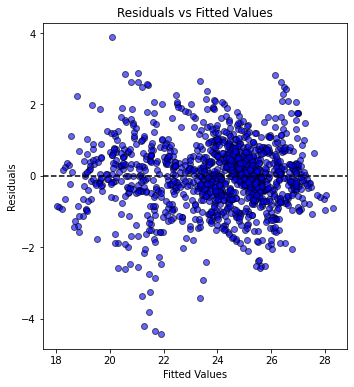

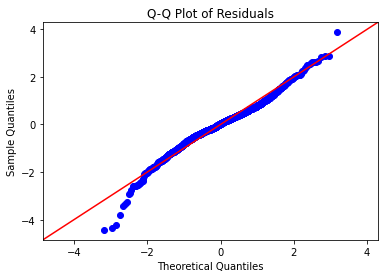


Transformed Model Summary:
                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     1083.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:14:22   Log-Likelihood:                -1781.1
No. Observations:                1318   AIC:                             3576.
Df Residuals:                    1311   BIC:                             3612.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------


In [28]:
y_transformed = np.power(Y_train_1, 3/4)
# Fit the model on transformed y
X_with_const = sm.add_constant(X_scaled_train_1[selected_model['subset']])
model_transformed = sm.OLS(y_transformed, X_with_const).fit()

transformed_residuals = model_transformed.resid
transformed_fitted_vals = model_transformed.fittedvalues

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(transformed_fitted_vals, transformed_residuals, edgecolor='k', facecolor='blue', alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

sm.qqplot(transformed_residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

print("\nTransformed Model Summary:")

# Perform Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(transformed_residuals)
print(model_transformed.summary())
print(f"\nShapiro-Wilk Test for Normality: W={shapiro_test[0]:.4f}, p-value={shapiro_test[1]:.4f}")

if shapiro_test[1] < 0.05:
    print("Residuals are not normally distributed (p < 0.05). A transformation may be required.")
else:
    print("Residuals appear to be normally distributed (p >= 0.05).")

# Checking for homoscedasticity
bp_test = sm.stats.diagnostic.het_breuschpagan(transformed_residuals, X_with_const)
print(f"\nBreusch-Pagan test for Homoscedasticity: Lagrange Multiplier statistic={bp_test[0]:.4f}, p-value={bp_test[1]:.4f}")

if bp_test[1] < 0.05:
    print("Residuals are heteroscedastic (p < 0.05). A transformation may be required.")
else:
    print("Residuals are homoscedastic (p >= 0.05).")



Use the test set to valify the model

Mean Squared Error (MSE): 0.9946016093828914
Root Mean Squared Error (RMSE): 0.9972971519977841
R-squared: 0.8342636907795221


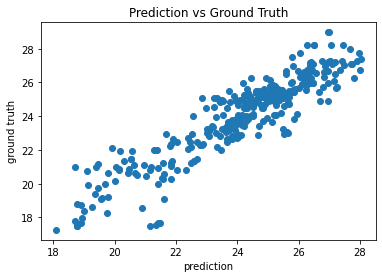

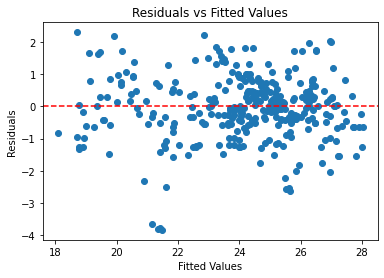

In [29]:
std_coefficients = model_transformed.params
variable_names = selected_model['subset']
selected_indices = [X_train.columns.get_loc(var) for var in variable_names]

selected_scale = scaler.scale_[selected_indices]
selected_mean = scaler.mean_[selected_indices]
original_coefficients = std_coefficients[1:] / selected_scale
original_intercept = std_coefficients.iloc[0] - np.sum((selected_mean / selected_scale) * std_coefficients[1:])
def predict_with_original_coefficients(X, coefficients, intercept):
    return np.dot(X, coefficients) + intercept

Y_pred = predict_with_original_coefficients(X_test[variable_names], original_coefficients, original_intercept)
transformed_Y_test = Y_test**(3/4)
mse = mean_squared_error(transformed_Y_test, Y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(transformed_Y_test, Y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')

# Plot ground truth vs prediction
plt.scatter(Y_pred, transformed_Y_test)
plt.xlabel('prediction')
plt.ylabel('ground truth')
plt.title('Prediction vs Ground Truth')
plt.show()

# Plot residual vs prediction
res = transformed_Y_test - Y_pred
plt.scatter(Y_pred, res)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [30]:
def plot_residuals_vs_predictors(X, residuals):
    """
    Plot residuals against each independent variable to check for patterns.

    Parameters:
    X -- pandas DataFrame with independent variables
    residuals -- model residuals
    """
    num_predictors = X.shape[1]
    plt.figure(figsize=(15, 5 * num_predictors))

    for i, col in enumerate(X.columns, 1):
        plt.subplot(num_predictors, 1, i)
        plt.scatter(X[col], residuals, edgecolor='k', facecolor='blue', alpha=0.6)
        plt.axhline(0, color='black', linestyle='--')
        plt.title(f'Residuals vs {col}')
        plt.xlabel(col)
        plt.ylabel('Residuals')

    plt.tight_layout()
    plt.show()

def residual_analysis_with_plots(X, y, model=None):
    """
    Perform residual analysis and plot residuals vs predictors.

    Parameters:
    X -- pandas DataFrame with independent variables
    y -- pandas Series with the dependent variable
    """
    if model == None:
        # Fit the linear regression model
        model = sm.OLS(y, X).fit()

        # Obtain model residuals
        residuals = model.resid
        fitted_vals = model.fittedvalues
    else:
        residuals = model.resid
        fitted_vals = model.fittedvalues

    # Plot Residuals vs Fitted values to check for Homoscedasticity
    plt.figure(figsize=(10, 6))
    plt.scatter(fitted_vals, residuals, edgecolor='k', facecolor='blue', alpha=0.6)
    plt.axhline(0, color='black', linestyle='--')
    plt.title('Residuals vs Fitted Values')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.show()

    # Plot residuals vs each predictor
    plot_residuals_vs_predictors(X, residuals)

    return residuals

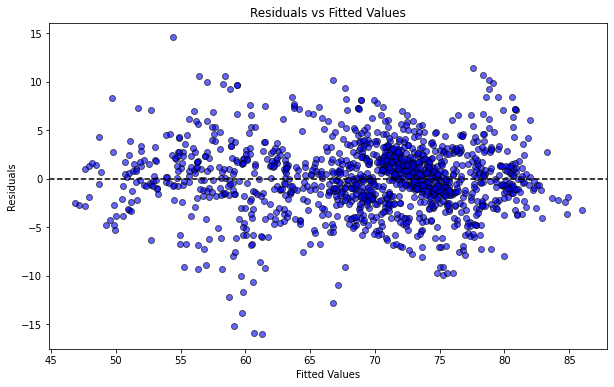

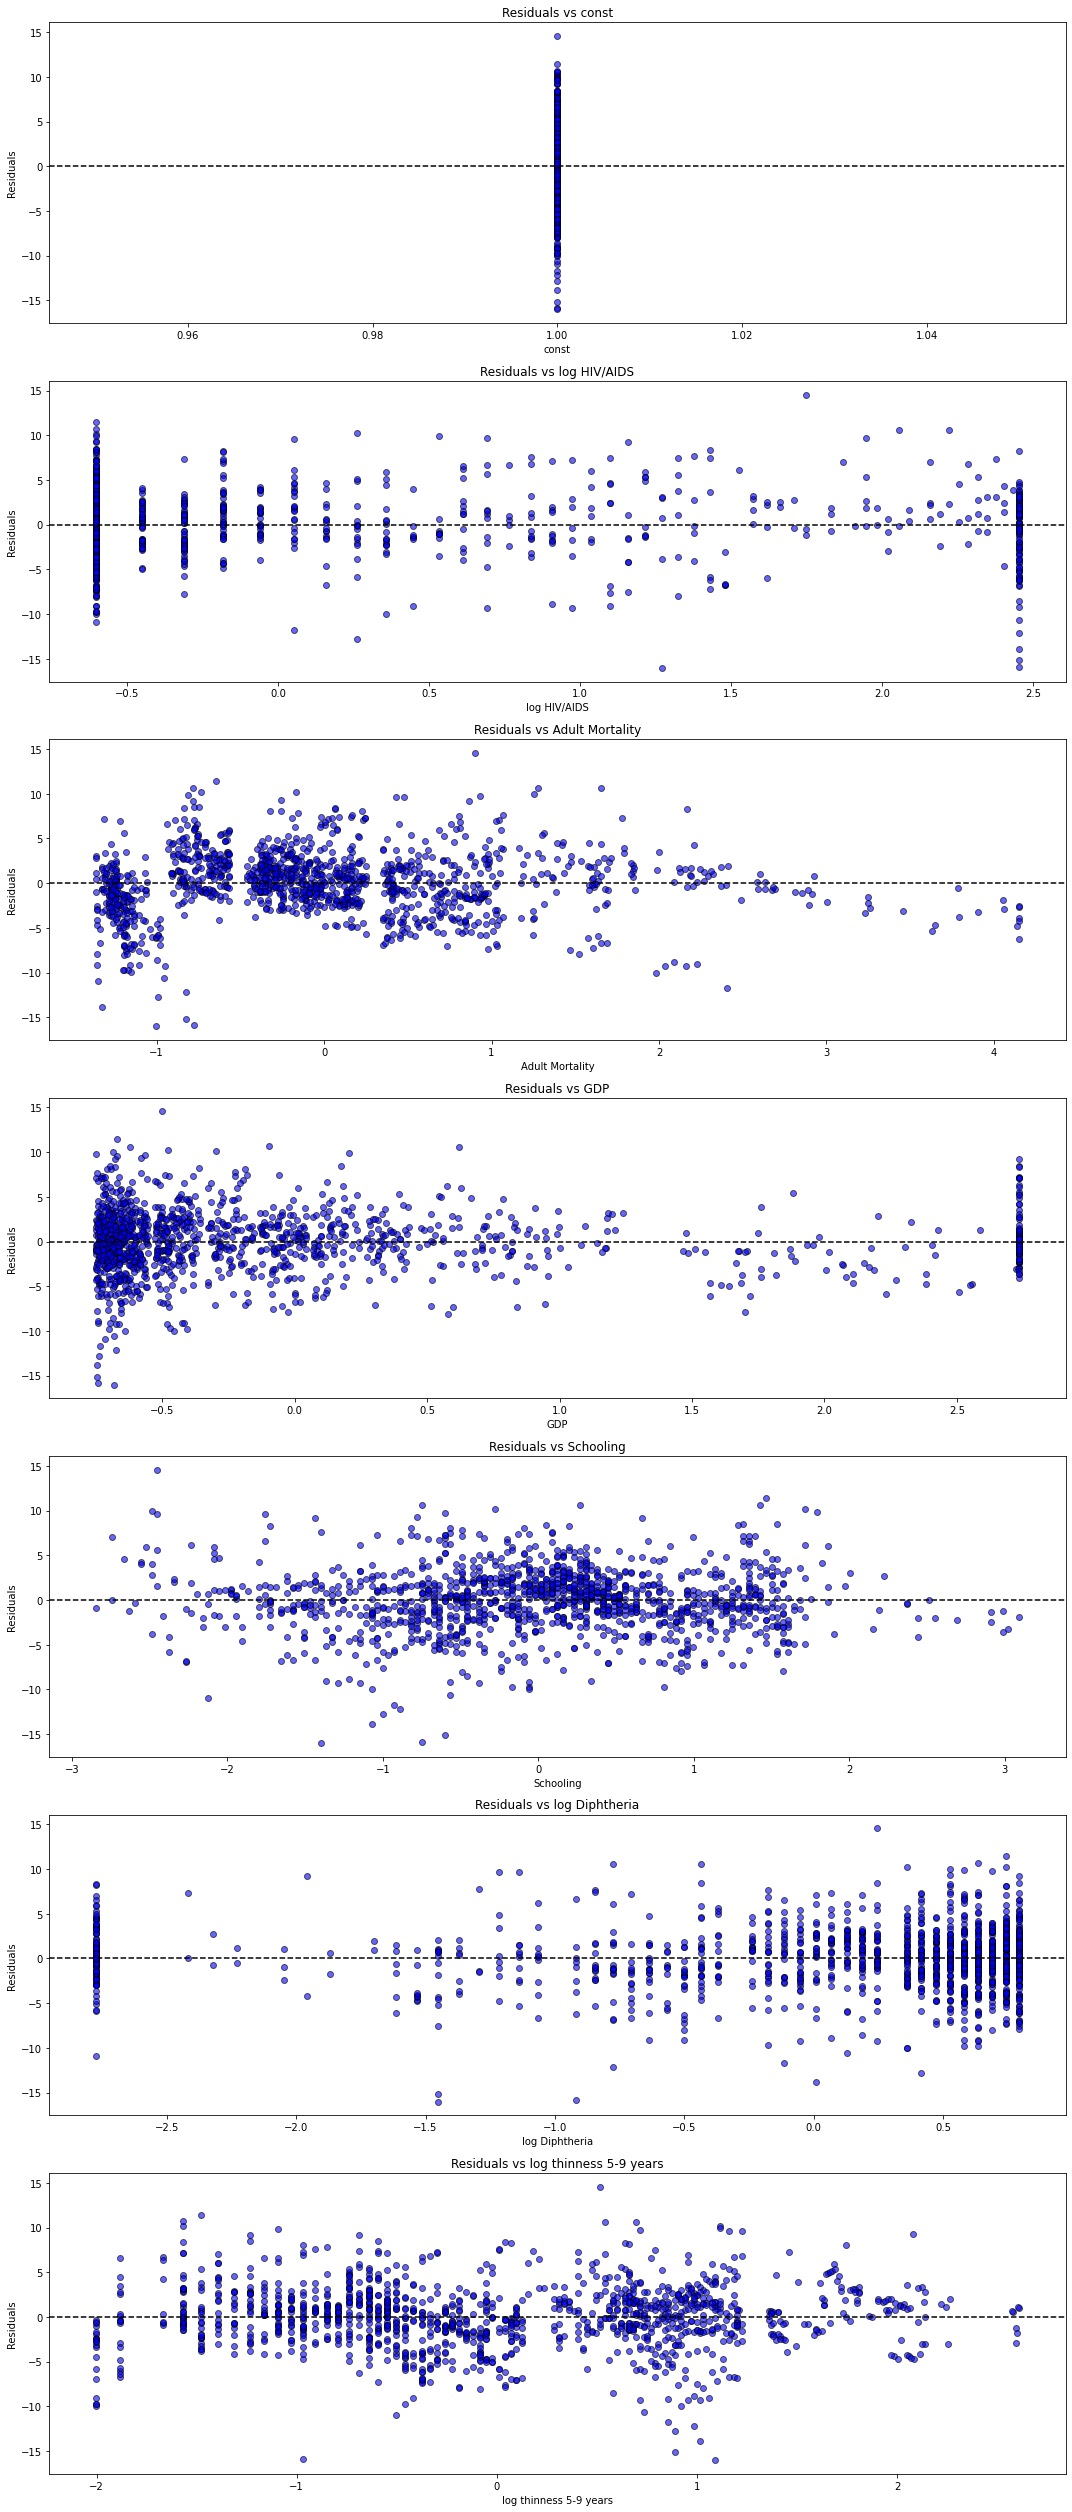

In [53]:
residuals = residual_analysis_with_plots(X_with_const, y_transformed)

In [106]:
robust_model = sm.OLS(y_transformed, X_with_const).fit(cov_type='HC0')
print(robust_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     1020.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:50:17   Log-Likelihood:                -1781.1
No. Observations:                1318   AIC:                             3576.
Df Residuals:                    1311   BIC:                             3612.
Df Model:                           6                                         
Covariance Type:                  HC0                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     23